In [1]:
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mplines
import matplotlib.patches as patches



#Animations
from matplotlib import animation, rc
from IPython.display import HTML, Image

<ipython-input-46-3f5a42236963>:27: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks([], [])
<ipython-input-46-3f5a42236963>:28: MatplotlibDeprecationWarning: Passing the minor parameter of set_yticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_yticks([], [])


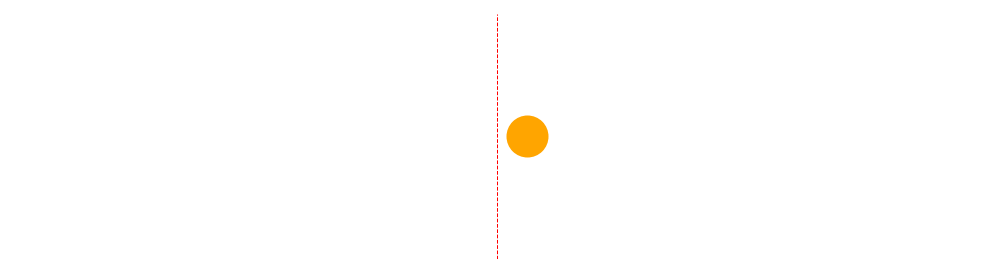

In [46]:
### Using http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/

## Steps I'm doing to make it work:
## 1. Installing homebrew
## 2. brew install imagemagick
## 3. brew install ffmpeg

size_of_font = 15

duration_of_anim = 1 #seconds
frames_per_second = 10

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
number_of_points = 1000
sample = int(number_of_points/2)
x_limit = 2

x = np.linspace(0, 2, number_of_points)

# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(7,2))

ax.set_xlim(( 0, 2))
ax.set_ylim((-0.5, 0.5))
#ax.set_xticklabels([])
ax.set_xticks([], [])
ax.set_yticks([], [])
#ax.set_yticklabels([])
#ax.set_ylabel('Vertical Displacement, $y$',fontsize=size_of_font)
#ax.set_xlabel('$x$',fontsize=size_of_font)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
#ax.spines["left"].set_position(("data",0))
#ax.spines["bottom"].set_position(("data",0))

ax.axvline(x=x[sample],linewidth=0.5,color='r',linestyle="--")



#line, = ax.plot([], [], lw=0.5,linestyle='-')

point, = ax.plot([],[],'o',markersize=20,color='orange')

#ax.plot(disp_x[sample],wave(disp_x[sample],time_coord),'o',color='blue',markersize=5)



# initialization function: plot the background of each frame
def init():
#    line.set_data([], [])
    point.set_data([],[])
    return (line,)

# animation function. This is called sequentially
def animate(i):
    y = np.sin(2 * np.pi * (x - 0.01 * i)) # The scalar on i helps us with the frame rates! scalar*frames must equal 1
    y_point=np.sin(2*np.pi*(x[sample]-0.01*i)) 
#    line.set_data(x[sample:], y[sample:])
    point.set_data(x[sample]+0.9*y_point,0)
#    plt.arrow([x[sample]+0.9*y_point],[0],[-1*0.2*(x[sample]+0.9*y_point)],[0])
    return (line,)


# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=30, blit=True)
#anim
plt.tight_layout()
anim.save('ch1-shm1.gif', writer='imagemagick', fps=60)
plt.savefig('ch1-shm1.pdf',transparent=True)
anim